# Loan Prediction - Case Study

In [1]:
# Loading required Packages
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
from warnings import simplefilter      # To ignore any warnings warnings.filterwarnings("ignore")

# suppress Future Warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
# load the train and test data
train = pd.read_csv("train_loan_prediction.csv") 
test = pd.read_csv("test_loan_prediction.csv")

# back it up - we are planning to change some of the columns for our analysis
train_original=train.copy() 
test_original=test.copy()

In [3]:
# lets have a look at a dataset
train.columns, test.columns

(Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
       dtype='object'),
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
       dtype='object'))

In [4]:
train.dtypes, test.dtypes

(Loan_ID               object
 Gender                object
 Married               object
 Dependents            object
 Education             object
 Self_Employed         object
 ApplicantIncome        int64
 CoapplicantIncome    float64
 LoanAmount           float64
 Loan_Amount_Term     float64
 Credit_History       float64
 Property_Area         object
 Loan_Status           object
 dtype: object, Loan_ID               object
 Gender                object
 Married               object
 Dependents            object
 Education             object
 Self_Employed         object
 ApplicantIncome        int64
 CoapplicantIncome      int64
 LoanAmount           float64
 Loan_Amount_Term     float64
 Credit_History       float64
 Property_Area         object
 dtype: object)

In [5]:
train.shape, test.shape

((614, 13), (367, 12))

In [6]:
# target variable - lets find categories and the frequency of it 
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [7]:
# Normalize can be set to True to get percent proportions instead of number 
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

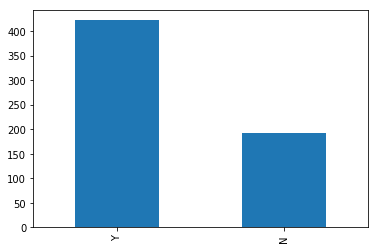

In [8]:
# plot the bar to understand the proportion
train['Loan_Status'].value_counts().plot.bar()

# Visualize each of the feature to understand the applicant's statistics
Categorical features: features with distinct categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)
Ordinal features: features with some wide varierty of categories (Dependents, Education, Property_Area)
Numerical features: features with numers (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

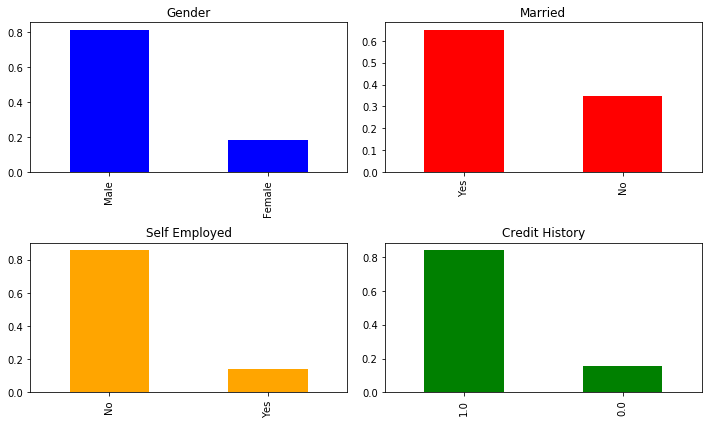

<Figure size 432x288 with 0 Axes>

In [9]:
# categorical variables plots
plt.figure()
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(10,6), title='Gender', color='Blue')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married', color='Red')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self Employed', color='Orange')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit History', color='Green')

plt.tight_layout()
plt.show()
# clear figure so that next one can be rendered seamlessly
plt.clf()

Observations from above figure:
- 80% of applicants are Male
- 65% of applicants are Married
- 10% applicants are self-employed
- mroe than 80% have clean credit history (no previous debts)

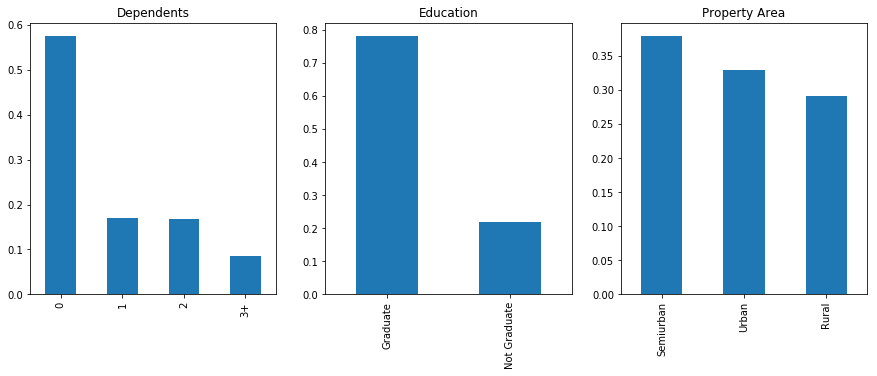

<Figure size 432x288 with 0 Axes>

In [10]:
# ordinal variables plots
plt.figure()
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(15,5), title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property Area')
plt.show()
plt.clf()

Observations from above figure:
- more than 55% of applicants have no kids
- 75% of applicants are Graduates
- Loans related to Semi-urban properties are mostly applied 

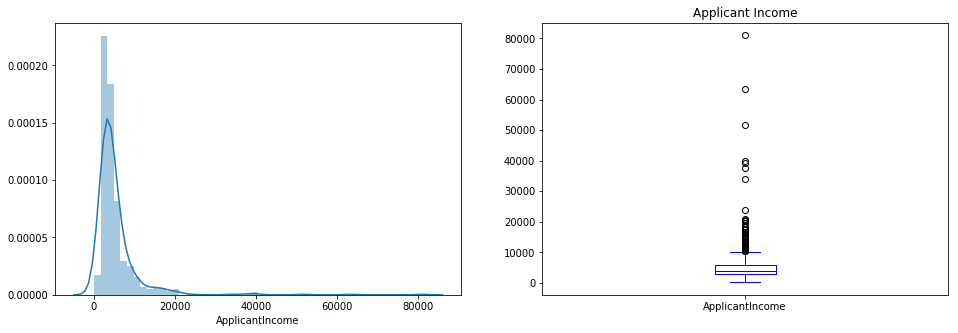

<Figure size 432x288 with 0 Axes>

In [11]:
# Numerical variables plot - bar plots are useful for categorical features; lets try box plot & seaborn's distplot
plt.figure()
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5), title='Applicant Income', color='Blue')
plt.show()
plt.clf()

observations:
- distplot shows that most of the data is on left part; we need to fix it such that it will be normally distributed
- box plot shows that there are many outliers

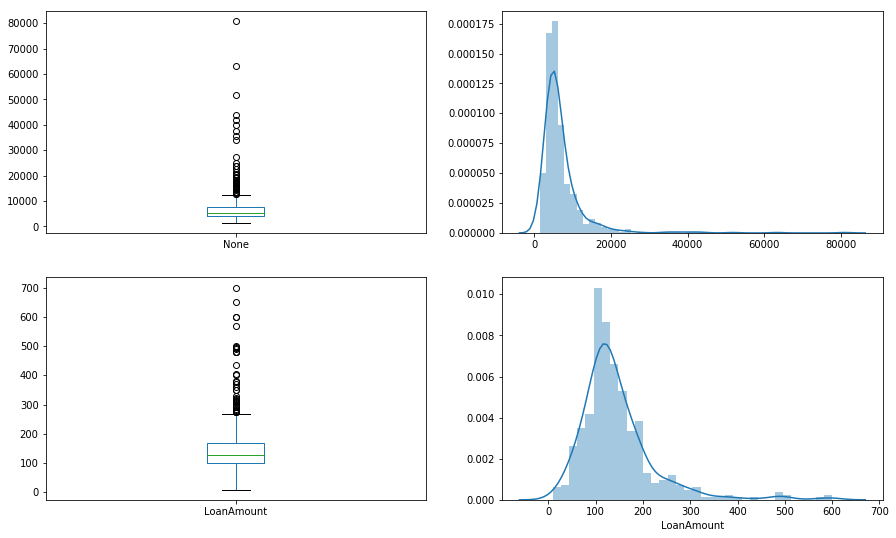

<Figure size 432x288 with 0 Axes>

In [12]:
plt.figure()
plt.subplot(221)
TotalIncome = train['ApplicantIncome'] + train['CoapplicantIncome']
TotalIncome.plot.box(figsize=(15,9))
plt.subplot(222)
sns.distplot(TotalIncome)
plt.subplot(223)
train['LoanAmount'].plot.box()

# Need to drop NaN before sns.distplot
df = train.dropna()
plt.subplot(224)
sns.distplot(df['LoanAmount'])
plt.show()
plt.clf()

# Mapping features against Target variable to see the relation
- lets map categorical, ordinal and numerical features against Target variable to see how each one is related. That will give some basis to our hypothesis

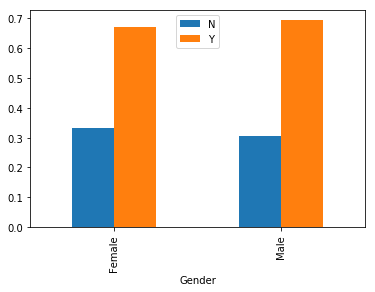

<Figure size 432x288 with 0 Axes>

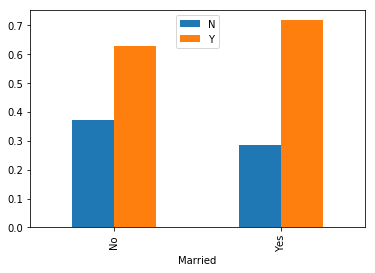

<Figure size 432x288 with 0 Axes>

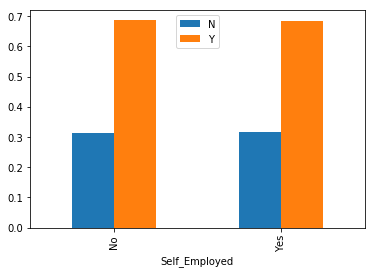

<Figure size 432x288 with 0 Axes>

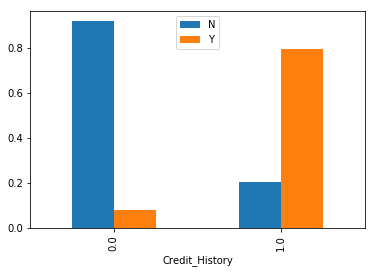

<Figure size 432x288 with 0 Axes>

In [13]:
# Categorical features (Gender, Married, Self_Employed, Credit_History) vs target variable (Loan_Status)
Gender = pd.crosstab(train['Gender'], train['Loan_Status']) # compute cross-tabulation
Gender.div(Gender.sum(1), axis=0).plot(kind="bar", figsize=(6,4)) # Floating element-wise division
plt.legend(loc="upper center")
plt.show()
plt.clf()

Married = pd.crosstab(train['Married'], train['Loan_Status'])
Married.div(Married.sum(1), axis=0).plot(kind="bar", figsize=(6,4))
plt.legend(loc="upper center")
plt.show()
plt.clf()

Self_Employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1), axis=0).plot(kind="bar", figsize=(6,4))
plt.legend(loc="upper center")
plt.show()
plt.clf()

Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Credit_History.div(Credit_History.sum(1), axis=0).plot(kind='bar', figsize=(6,4))
plt.legend(loc="upper center")
plt.show()
plt.clf()

Observation: 
- Male and Female proportion for loan approval is moreover same
- Married people have a little higher percentage of approval
- Self Employed does not have much impact
- Having clean Credit history shows very high impact on approval rate 

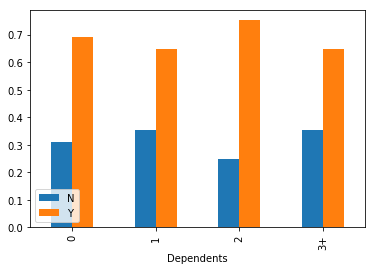

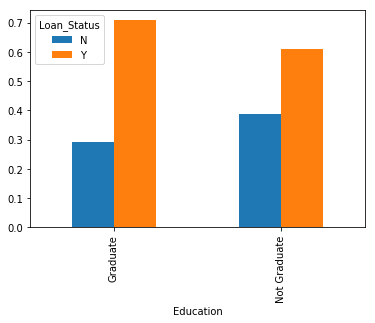

<Figure size 432x288 with 0 Axes>

In [14]:
# ordinal features (Dependents, Education, Property_Area) vs Target variable (Loan_Status)
Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Dependents.div(Dependents.sum(1), axis=0).plot(kind="bar")
plt.legend(loc="lower left")

Education = pd.crosstab(train['Education'], train['Loan_Status'])
Education.div(Education.sum(1), axis=0).plot(kind="bar")

Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])
Property_Area.div(Property_Area.sum(1), axis=0).plot(kind="bar")
plt.legend(loc='lower left')
plt.clf()

Observations:
- Dependents doesn't shows major impact on loan approval rate
- Graduates have higher rate of approval
- Semi urban locations shows up better rate of approval

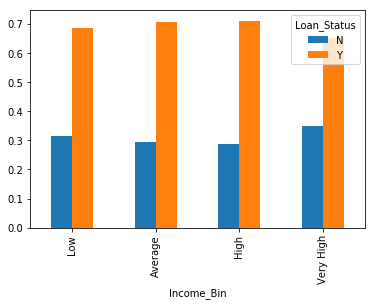

In [15]:
# numerical features (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term) vs Target variable (Loan_Status)
# lets make bins for ApplicantIncome; check some quick stats for ApplicantIncome ranges
"""print(
    max(train['ApplicantIncome']),
    train[train['ApplicantIncome']<2500]['ApplicantIncome'].count(),
    train[(train['ApplicantIncome']>2500) & (train['ApplicantIncome']<4000)]['ApplicantIncome'].count(),
    train[(train['ApplicantIncome']>4000) & (train['ApplicantIncome']<6000)]['ApplicantIncome'].count(),
    train[train['ApplicantIncome']<6000]['ApplicantIncome'].count()
)
"""
bins = [0,2500,4000,6000,81000]
group = ['Low', 'Average', 'High', 'Very High']
df = train.dropna()
train['Income_Bin'] = pd.cut(df['ApplicantIncome'], bins, labels=group)
Income_Bin = pd.crosstab(train['Income_Bin'], train['Loan_Status'])
Income_Bin.div(Income_Bin.sum(1), axis=0).plot(kind="bar")

Observation: Income levels does not show varied impact here, lets try to add up CoapplicantIncome

Text(0, 0.5, 'Loan Approval Percentage')

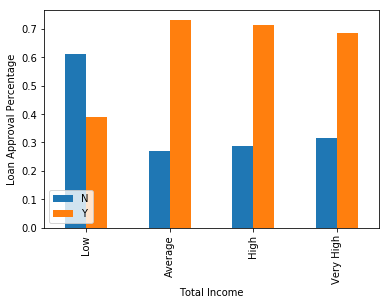

In [16]:
train['Total_Income'] = pd.cut( (df['ApplicantIncome'] + df['CoapplicantIncome']) , bins, labels=group)
Total_Income_Bin = pd.crosstab(train['Total_Income'], train['Loan_Status'])
Total_Income_Bin.div(Total_Income_Bin.sum(1), axis=0).plot(kind="bar")
plt.legend(loc="lower left")
plt.xlabel("Total Income")
plt.ylabel("Loan Approval Percentage")

Observation: The Total_Income graph shows much relevancy to our hypothesis. 
Lower income range does have higher rejection rate and 'average and above average' groups stands good chance of approval 

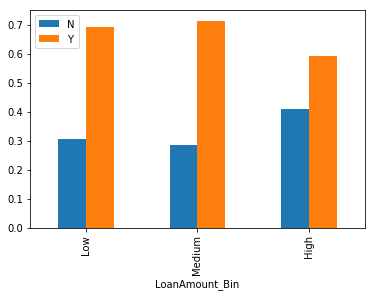

In [17]:
# LoanAmount
bins=[0,100,200,700]
group = ['Low', 'Medium', 'High']
train['LoanAmount_Bin'] = pd.cut(df['LoanAmount'], bins, labels=group)
LoanAmount_Bin = pd.crosstab(train['LoanAmount_Bin'], train['Loan_Status'])
LoanAmount_Bin.div(LoanAmount_Bin.sum(1), axis=0).plot(kind="bar")
plt.legend(loc="upper left")

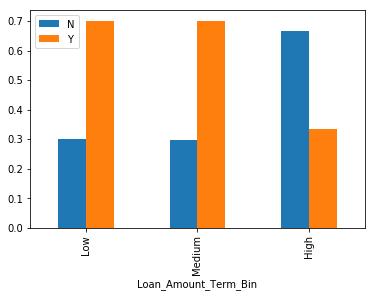

In [18]:
# Loan_Amount_Term
bins=[0,120,360,1000]
group = ['Low', 'Medium', 'High']
train['Loan_Amount_Term_Bin'] = pd.cut(df['Loan_Amount_Term'], bins, labels=group)
Loan_Amount_Term_Bin = pd.crosstab(train['Loan_Amount_Term_Bin'], train['Loan_Status'])
Loan_Amount_Term_Bin.div(Loan_Amount_Term_Bin.sum(1), axis=0).plot(kind="bar")
plt.legend(loc="upper left")

Observations:
- Loan_Amount Low and Medium ranges have higher approval rates
- Loan_Amount_Term for Low and Medium have higher approval rates too

In [19]:
# We saw that Credit History has the most impact on ourr target variable.
# Lets see how many nulls we have in this column
train['Credit_History'].isnull().sum()

50

In [20]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income_Bin', 'Total_Income', 'LoanAmount_Bin', 'Loan_Amount_Term_Bin'],
      dtype='object')

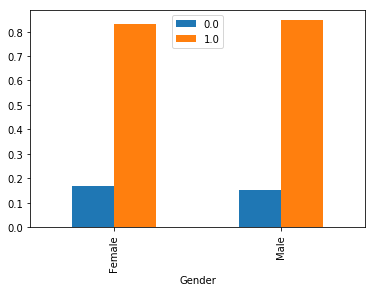

<Figure size 432x288 with 0 Axes>

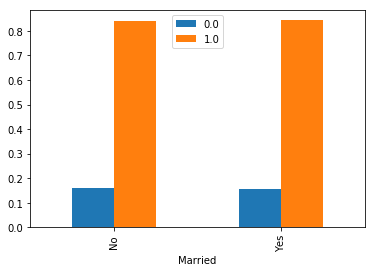

<Figure size 432x288 with 0 Axes>

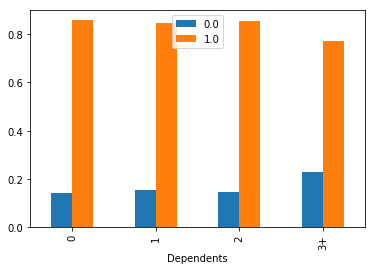

<Figure size 432x288 with 0 Axes>

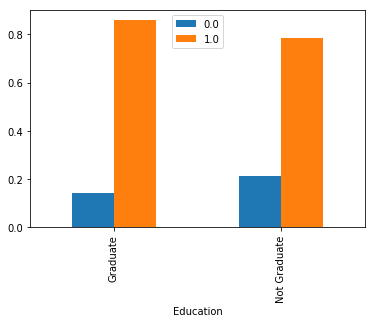

<Figure size 432x288 with 0 Axes>

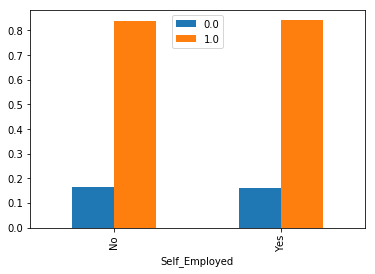

<Figure size 432x288 with 0 Axes>

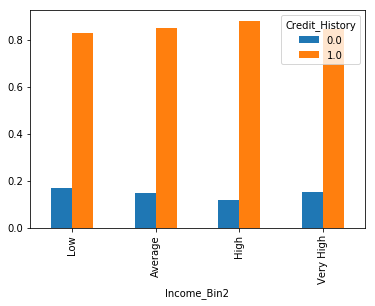

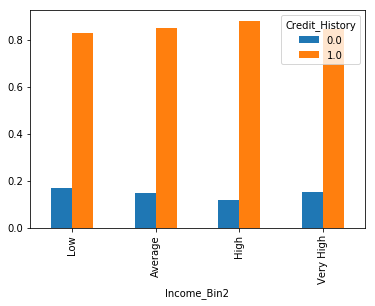

In [21]:
# Let's see how Credit_History is dependent on below factors (try ti find multicolinearity): 
# Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome
# This will help us predict better Credit_History and in turn better Loan_Status

Gender = pd.crosstab(train['Gender'], train['Credit_History']) # compute cross-tabulation
Gender.div(Gender.sum(1), axis=0).plot(kind="bar", figsize=(6,4)) # Floating element-wise division
plt.legend(loc="upper center")
plt.show()
plt.clf()

Married = pd.crosstab(train['Married'], train['Credit_History'])
Married.div(Married.sum(1), axis=0).plot(kind="bar", figsize=(6,4))
plt.legend(loc="upper center")
plt.show()
plt.clf()

Dependents = pd.crosstab(train['Dependents'], train['Credit_History'])
Dependents.div(Dependents.sum(1), axis=0).plot(kind='bar', figsize=(6,4))
plt.legend(loc="upper center")
plt.show()
plt.clf()

Education = pd.crosstab(train['Education'], train['Credit_History'])
Education.div(Education.sum(1), axis=0).plot(kind='bar', figsize=(6,4))
plt.legend(loc="upper center")
plt.show()
plt.clf()

Self_Employed = pd.crosstab(train['Self_Employed'], train['Credit_History'])
Self_Employed.div(Self_Employed.sum(1), axis=0).plot(kind="bar", figsize=(6,4))
plt.legend(loc="upper center")
plt.show()
plt.clf()

bins = [0,2500,4000,6000,81000]
group = ['Low', 'Average', 'High', 'Very High']
df = train.dropna()
train['Income_Bin2'] = pd.cut(df['ApplicantIncome'], bins, labels=group)
Income_Bin = pd.crosstab(train['Income_Bin2'], train['Credit_History'])
Income_Bin.div(Income_Bin.sum(1), axis=0).plot(kind="bar")

bins = [0,2500,4000,6000,81000]
group = ['Low', 'Average', 'High', 'Very High']
df = train.dropna()
train['Income_Bin3'] = pd.cut(df['CoapplicantIncome'], bins, labels=group)
Income_Bin = pd.crosstab(train['Income_Bin2'], train['Credit_History'])
Income_Bin.div(Income_Bin.sum(1), axis=0).plot(kind="bar")

In [22]:
# drop the bins we created for understaning stats
train.columns
train.drop(['Income_Bin','Income_Bin2','Income_Bin3', 'Total_Income','LoanAmount_Bin','Loan_Amount_Term_Bin'], axis=1, inplace=True)

# replace Dependents "3+" to "3" in train and test both
train['Dependents'].replace('3+', '3', inplace=True)
test['Dependents'].replace('3+', '3', inplace=True)
# map Loan_Status to numbers
train['Loan_Status'].replace('Y', '1', inplace=True)
train['Loan_Status'].replace('N', '0', inplace=True)

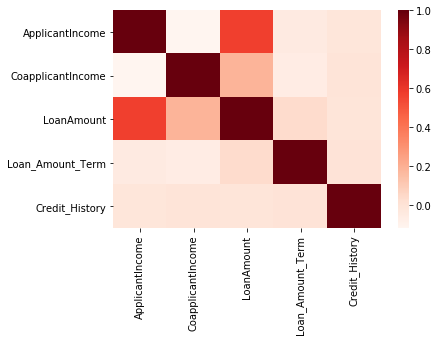

In [23]:
# heat map to visualize the correlation between all numerical features.
matrix = train.corr() # compute pairwise co-relation
fig, ax = plt.subplots()
sns.heatmap(matrix, cmap='Reds')

Observations:
- LoanAmount & ApplicantIncome, CoapplicantIncome are co-related
- Credit_History & Loan_Status are co-related

# Fixing Missing values and Outlier treatment

In [24]:
# find nulls in each column
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- numerical variables fill NaNs by either mean (sum/count) or median (sort & find middle value)
- categorical variables fill Nans by mode (maximum occurences)

In [25]:
#categorical features null treatment
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

#Numerical features null treatment

# Property area wise mean to replace in LoanAmount
train["LoanAmount"].fillna(train.groupby("Property_Area")["LoanAmount"].transform("mean"), inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) # mode seems more relevant here

In [26]:
# replace the same in test
#categorical features null treatment
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)

#Numerical features null treatment

# Property area wise mean to replace in LoanAmount
test["LoanAmount"].fillna(test.groupby("Property_Area")["LoanAmount"].transform("mean"), inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True) # mode seems more relevant here

In [27]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [28]:
train.isnull().sum(), test.isnull().sum()

(Loan_ID              0
 Gender               0
 Married              0
 Dependents           0
 Education            0
 Self_Employed        0
 ApplicantIncome      0
 CoapplicantIncome    0
 LoanAmount           0
 Loan_Amount_Term     0
 Credit_History       0
 Property_Area        0
 Loan_Status          0
 dtype: int64, Loan_ID              0
 Gender               0
 Married              0
 Dependents           0
 Education            0
 Self_Employed        0
 ApplicantIncome      0
 CoapplicantIncome    0
 LoanAmount           0
 Loan_Amount_Term     0
 Credit_History       0
 Property_Area        0
 dtype: int64)

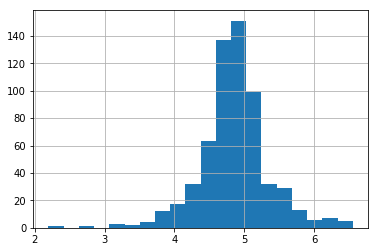

In [29]:
# Outliers treatment - parametrization (tweaking parameters to fix probability distribution)

# natural log is inverse of exponential fn; used to treat outliers / extreme values
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

# Treat test data as well
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [30]:
# get rid of Loan_ID variable, we dont need it for prediction
train=train.drop('Loan_ID', axis=1)
test=test.drop('Loan_ID', axis=1)

In [31]:
# Sklearn models for prediction: the target variable needs to be in a separate dataset
X = train.drop('Loan_Status', axis=1)
y = train['Loan_Status']

# lets make dummy variables for categorical features
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

# Train Test split
we have Loan_Status in Train; so for prediction purpose, let's split Train df into 2 parts, lets call - train and validate

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_validate, y_train, y_validate = train_test_split(X, y, test_size = 0.3)

# Attempt 1 : Logistic Regression model
Definition: Logistic regression is a machine learning algorithm for classification. In this algorithm, the probabilities describing the possible outcomes of a single trial are modelled using a logistic function.

Advantages: Logistic regression is designed for this purpose (classification), and is most useful for understanding the influence of several independent variables on a single outcome variable.

Disadvantages: Works only when the predicted variable is binary, assumes all predictors are independent of each other, and assumes data is free of missing values.

In [33]:
# Import
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() # Initialize
model.fit(x_train, y_train) # fit the model with 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
# predict the Loan_Status for validation set
y_pred = model.predict(x_validate)

In [35]:
# calculate accuracy of our predictions (y_pred) against real data (y_validate)
from sklearn.metrics import accuracy_score
accuracy_score(y_validate, y_pred)

0.8054054054054054

In [36]:
# lets predict the actual test file
pred_test = model.predict(test)
# add it into submission file for hackathon
submission = pd.read_csv('sample_submission_S7jWYrJ.csv') # Read the final submission file
submission['Loan_Status'] = pred_test # Fill the predicted target
submission['Loan_ID'] = test_original['Loan_ID'] # Move the Loan_ID back
submission['Loan_Status'].replace('0', 'N', inplace=True) # Convert 0 and 1 to N and Y resp; to their basic types
submission['Loan_Status'].replace('1', 'Y', inplace=True)
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('submission.csv')

# Attempt 2: StratifiedKFold to split data

In [37]:
# Lets StratifiedKFold model to split our data to test LogisticRegression
from sklearn.model_selection import StratifiedKFold

i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    x_train, x_validate = X.loc[train_index], X.loc[test_index]
    y_train, y_validate = y[train_index], y[test_index]
    
    # Use LogisticRegression on this split
    model2 = LogisticRegression(random_state=1)
    model2.fit(x_train, y_train)
    y_pred = model2.predict(x_validate)
    score = accuracy_score(y_validate, y_pred)
    print('accuracy_score',score)
    i+=1


1 of kfold 5
accuracy_score 0.8064516129032258

2 of kfold 5
accuracy_score 0.8064516129032258

3 of kfold 5
accuracy_score 0.8114754098360656

4 of kfold 5
accuracy_score 0.7868852459016393

5 of kfold 5
accuracy_score 0.8360655737704918


# Attempt 3: Random Forest
Definition: Random forest classifier is a meta-estimator that fits a number of decision trees on various sub-samples of datasets and uses average to improve the predictive accuracy of the model and controls over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement.

Advantages: Reduction in over-fitting and random forest classifier is more accurate than decision trees in most cases.

Disadvantages: Slow real time prediction, difficult to implement, and complex algorithm.

In [38]:
from sklearn.ensemble import RandomForestClassifier

i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    x_train, x_validate = X.loc[train_index], X.loc[test_index]
    y_train, y_validate = y[train_index], y[test_index]
    
    model3 = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)
    model3.fit(x_train, y_train)
    y_pred = model3.predict(x_validate)
    score = accuracy_score(y_validate, y_pred)
    print('accuracy_score', score)
    i+=1


1 of kfold 5
accuracy_score 0.8064516129032258

2 of kfold 5
accuracy_score 0.8064516129032258

3 of kfold 5
accuracy_score 0.8032786885245902

4 of kfold 5
accuracy_score 0.7950819672131147

5 of kfold 5
accuracy_score 0.8278688524590164


# Attempt 4: MinMaxScaler pre-processing

In [39]:
# MinMax Scaler instead of dummy variables
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

# Scaling down both train and test data set
X_train_minmax = min_max.fit_transform(x_train[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
X_test_minmax = min_max.fit_transform(x_validate[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])

from sklearn.neighbors import KNeighborsClassifier
#Fitting k-NN on our scaled data set
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_minmax,y_train)
# Checking the model's accuracy
# lets predict the actual test file
pred_test = knn.predict(X_test_minmax)
accuracy_score(y_validate, pred_test)

0.8032786885245902

# Attempt 5

In [40]:
# Import
from sklearn.linear_model import LogisticRegression
model4 = LogisticRegression() # Initialize
model4.fit(X_train_minmax,y_train) # fit the model with 
# predict the Loan_Status for validation set
pred_test = model4.predict(X_test_minmax)
accuracy_score(y_validate, pred_test)

0.8360655737704918